# Prediction using Unsupervised ML

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv("C:\\Users\\joginder\\Desktop\\python intellipaat\\tsf\\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Analysis

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Finding the optimal number of clusters

In [5]:
x = df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
wcss    

[281831.54466666654,
 70581.3808,
 31320.711199999994,
 17762.657226173542,
 11423.238080088988,
 7909.5306730769225,
 5881.448116883118,
 4562.780079365082,
 3579.7205612745106,
 2968.4914326653743]

## Plot the Elbow Graph

In [6]:
import matplotlib.pyplot as plt 

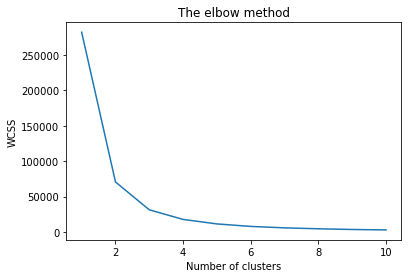

In [8]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

##  Training the model and visualizing result

In [17]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_pred = kmeans.fit_predict(x)

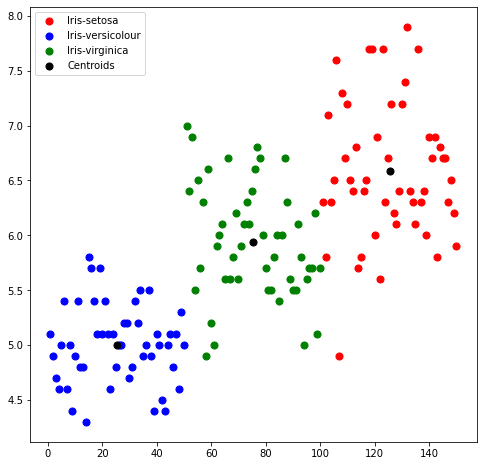

In [22]:
#Plotting the clusters
plt.figure(figsize=(8,8))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')

plt.legend()